# Improving the way neural networks learn

Mejoras:
    - Función de costo distinta: "Cross-entropy"
    - Cuatro métodos de regularización: L1, L2, dropuot, artificial expansion of the training data
    - Heurísticas para elegir buenos "hiperparámetros"
    - Otras técnicas

La función de costo cuadrática tiene el problema de que hace que la red "aprenda" muy lento cuando los valores están muy alejados del objetivo. Para solucionar ese problema se introduce la función de "entropía cruzada" (cross-entropy).

$$C = -\frac{1}{n} \sum_x [y \ ln(a) + (1-y) \ ln(1-a)]$$

Haciendo cuentas, se llega (para una neurona sóla) a:
$$\frac{\partial C}{\partial w_j} = \frac{1}{n} \sum_x x_j (\sigma(z)-y)$$

y para el bias:
$$\frac{\partial C}{\partial b} = \frac{1}{n} \sum_x (\sigma(z)-y)$$

network2.py implementa una red que usa la función de "cross-entropy"

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
import network2
net = network2.Network([784,30,10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()

In [2]:
net.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9159 / 10000

Epoch 1 training complete
Accuracy on evaluation data: 9287 / 10000

Epoch 2 training complete
Accuracy on evaluation data: 9342 / 10000

Epoch 3 training complete
Accuracy on evaluation data: 9341 / 10000

Epoch 4 training complete
Accuracy on evaluation data: 9419 / 10000

Epoch 5 training complete
Accuracy on evaluation data: 9396 / 10000

Epoch 6 training complete
Accuracy on evaluation data: 9419 / 10000

Epoch 7 training complete
Accuracy on evaluation data: 9377 / 10000

Epoch 8 training complete
Accuracy on evaluation data: 9438 / 10000

Epoch 9 training complete
Accuracy on evaluation data: 9438 / 10000

Epoch 10 training complete
Accuracy on evaluation data: 9474 / 10000

Epoch 11 training complete
Accuracy on evaluation data: 9474 / 10000

Epoch 12 training complete
Accuracy on evaluation data: 9481 / 10000

Epoch 13 training complete
Accuracy on evaluation data: 9471 / 10000

Epoch 14 training complete
Acc

([],
 [9159,
  9287,
  9342,
  9341,
  9419,
  9396,
  9419,
  9377,
  9438,
  9438,
  9474,
  9474,
  9481,
  9471,
  9487,
  9501,
  9481,
  9453,
  9503,
  9512,
  9483,
  9489,
  9527,
  9484,
  9504,
  9516,
  9513,
  9506,
  9487,
  9513],
 [],
 [])

In [3]:
net = network2.Network([784,100,10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()

In [4]:
net.SGD(training_data, 30, 10, 0.5, evaluation_data=test_data, monitor_evaluation_accuracy=True)

Epoch 0 training complete
Accuracy on evaluation data: 9246 / 10000

Epoch 1 training complete
Accuracy on evaluation data: 9416 / 10000

Epoch 2 training complete
Accuracy on evaluation data: 9487 / 10000

Epoch 3 training complete
Accuracy on evaluation data: 9561 / 10000

Epoch 4 training complete
Accuracy on evaluation data: 9573 / 10000

Epoch 5 training complete
Accuracy on evaluation data: 9571 / 10000

Epoch 6 training complete
Accuracy on evaluation data: 9630 / 10000

Epoch 7 training complete
Accuracy on evaluation data: 9599 / 10000

Epoch 8 training complete
Accuracy on evaluation data: 9637 / 10000

Epoch 9 training complete
Accuracy on evaluation data: 9605 / 10000

Epoch 10 training complete
Accuracy on evaluation data: 9642 / 10000

Epoch 11 training complete
Accuracy on evaluation data: 9633 / 10000

Epoch 12 training complete
Accuracy on evaluation data: 9647 / 10000

Epoch 13 training complete
Accuracy on evaluation data: 9642 / 10000

Epoch 14 training complete
Acc

([],
 [9246,
  9416,
  9487,
  9561,
  9573,
  9571,
  9630,
  9599,
  9637,
  9605,
  9642,
  9633,
  9647,
  9642,
  9634,
  9654,
  9641,
  9657,
  9644,
  9659,
  9659,
  9666,
  9665,
  9664,
  9663,
  9677,
  9655,
  9664,
  9667,
  9660],
 [],
 [])

Otra opción para intentar arreglar el problema del aprendizaje lento por saturación, es usar "softmax".
En softmax se cambia la capa de salida de la red. Se empieza, igual que antes, con la suma ponderada:
$$z_j^L = \sum_k w_jk^L a_k^{L-1} + b_j^L$$
Pero después, en vez de aplicar la función sigmoide, se calcula la salida usando los $z_j^L$ de todas las neuronas de salida, de la siguiente forma:
$$a_j^L = \frac{e^{z_j^L}}{\sum_k e^{z_k^L}}$$

Con softmax, las salidas se pueden interpretar como probabilidades de que el valor buscado sea el de la neurona j de salida.

Para softmax se puede usar la función de costo "log-likelihood":
$$C = -ln(a_y^L)$$

En ese caso, se obtiene (igual que con la entropía cruzada):
$$\frac{\partial C}{\partial b_j^L} = a_j^L - y_j$$
$$\frac{\partial C}{\partial w_{jk}^L} = a_k^{L-1}(a_j^L - y_j)$$

En resumen, usar una capa de salida "sigmoide" con función de costo "cross-entropy" es más o menos equivalente a usar una capa de salida "softmax" con función de costo "log-likelihood". En el caso de "softmax" se tiene la ventaja de que se pueden interpretar las salidas como probabilidades para clases disjuntas (aunque en muchos problemas eso no es importante).

## Overfitting and Regularization

In [1]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
import network2
net = network2.Network([784,30,10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()

In [2]:
net.SGD(training_data[:1000], 400, 10, 0.5, evaluation_data=test_data,
        monitor_evaluation_accuracy=True, monitor_training_cost=True)

Epoch 0 training complete
Cost on training data: 2.01038023486
Accuracy on evaluation data: 5288 / 10000

Epoch 1 training complete
Cost on training data: 1.43118060048
Accuracy on evaluation data: 6720 / 10000

Epoch 2 training complete
Cost on training data: 1.17087085515
Accuracy on evaluation data: 6945 / 10000

Epoch 3 training complete
Cost on training data: 0.925978388045
Accuracy on evaluation data: 7438 / 10000

Epoch 4 training complete
Cost on training data: 1.11248002747
Accuracy on evaluation data: 6760 / 10000

Epoch 5 training complete
Cost on training data: 0.685610512464
Accuracy on evaluation data: 7782 / 10000

Epoch 6 training complete
Cost on training data: 0.617105035023
Accuracy on evaluation data: 7809 / 10000

Epoch 7 training complete
Cost on training data: 0.570512452045
Accuracy on evaluation data: 7894 / 10000

Epoch 8 training complete
Cost on training data: 0.509415782572
Accuracy on evaluation data: 7879 / 10000

Epoch 9 training complete
Cost on trainin

([],
 [5288,
  6720,
  6945,
  7438,
  6760,
  7782,
  7809,
  7894,
  7879,
  7953,
  8050,
  8060,
  8098,
  8126,
  8103,
  8169,
  8153,
  8150,
  8200,
  8203,
  8167,
  8157,
  8171,
  8168,
  8194,
  8187,
  8185,
  8201,
  8201,
  8199,
  8194,
  8228,
  8201,
  8204,
  8222,
  8230,
  8217,
  8235,
  8204,
  8234,
  8226,
  8224,
  8246,
  8230,
  8246,
  8252,
  8210,
  8234,
  8255,
  8241,
  8261,
  8259,
  8247,
  8259,
  8255,
  8255,
  8228,
  8239,
  8246,
  8260,
  8250,
  8242,
  8268,
  8257,
  8257,
  8254,
  8267,
  8267,
  8276,
  8259,
  8274,
  8245,
  8253,
  8274,
  8279,
  8264,
  8262,
  8270,
  8265,
  8264,
  8266,
  8278,
  8270,
  8286,
  8255,
  8286,
  8271,
  8272,
  8278,
  8279,
  8279,
  8266,
  8262,
  8276,
  8277,
  8280,
  8273,
  8268,
  8272,
  8264,
  8261,
  8281,
  8272,
  8271,
  8273,
  8271,
  8269,
  8270,
  8268,
  8280,
  8275,
  8262,
  8262,
  8263,
  8272,
  8269,
  8284,
  8270,
  8273,
  8278,
  8280,
  8273,
  8265,
  8276,
  8

In [3]:
test_cost, test_accuracy, training_cost, training_accuracy = _

In [6]:
#Guardo los datos de la red neuronal
import json
import sys

f = open('red2.json', "w")
json.dump([test_cost, test_accuracy, training_cost, training_accuracy], f)
f.close()

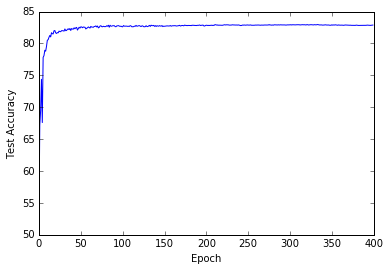

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(range(len(test_accuracy)),np.divide(test_accuracy,100.0))
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
#plt.xlim([200,400])
#plt.ylim([test_accuracy[200]/100.0,test_accuracy[200]/100.0])
#plt.ylim?
plt.show()

In [12]:
print('Test Accuracy final: %.2f %%' %(test_accuracy[-1]/100))

Test Accuracy final: 82.00 %


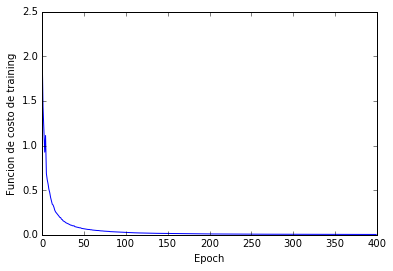

In [14]:
plt.plot(range(len(training_cost)),training_cost)
plt.xlabel('Epoch')
plt.ylabel('Funcion de costo de training')
plt.show()

In [30]:
net = network2.Network([784,30,10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data, 
                                                                     30, 10, 0.5, 
                                                                     evaluation_data=test_data, 
                                                                     monitor_evaluation_accuracy=True,
                                                                    monitor_evaluation_cost=True,
                                                                    monitor_training_cost=True,
                                                                    monitor_training_accuracy=True)
f = open('red50000.json', "w")
json.dump([test_cost, test_accuracy, training_cost, training_accuracy], f)
f.close()

Epoch 0 training complete
Cost on training data: 0.560729135136
Accuracy on training data: 45769 / 50000
Cost on evaluation data: 0.557603184646
Accuracy on evaluation data: 9145 / 10000

Epoch 1 training complete
Cost on training data: 0.447625488077
Accuracy on training data: 46754 / 50000
Cost on evaluation data: 0.467114462436
Accuracy on evaluation data: 9304 / 10000

Epoch 2 training complete
Cost on training data: 0.377064442476
Accuracy on training data: 47255 / 50000
Cost on evaluation data: 0.421338904709
Accuracy on evaluation data: 9361 / 10000

Epoch 3 training complete
Cost on training data: 0.36475448767
Accuracy on training data: 47372 / 50000
Cost on evaluation data: 0.408239940732
Accuracy on evaluation data: 9392 / 10000

Epoch 4 training complete
Cost on training data: 0.325004268919
Accuracy on training data: 47723 / 50000
Cost on evaluation data: 0.377884066877
Accuracy on evaluation data: 9449 / 10000

Epoch 5 training complete
Cost on training data: 0.3190778378

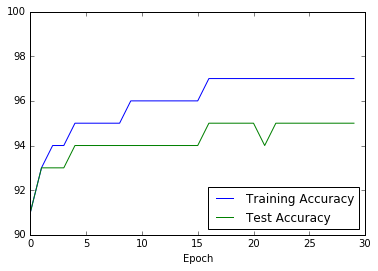

In [35]:
plt.plot(range(len(training_accuracy)),np.divide(training_accuracy,500),label='Training Accuracy')
plt.plot(range(len(test_accuracy)),np.divide(test_accuracy,100),label='Test Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.ylim((90,100))
plt.show()

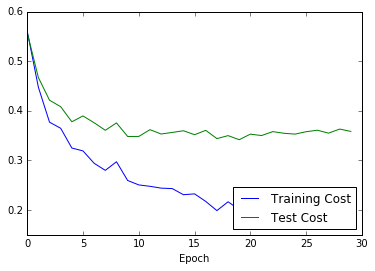

In [36]:
plt.plot(range(len(training_cost)),training_cost,label='Training Cost')
plt.plot(range(len(test_cost)),test_cost,label='Test Cost')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Función de costo regularizada:
$$C = \frac{-1}{n} \sum_{x_j} [y_j \ ln(a_j^L) + (1-y_j) ln(1-a_j^L)] + \frac{\lambda}{2n}\sum_w w^2$$

Ahora entreno la red con 1000 muestras de entrenamiento, pero con regularización ($\lambda = 0.1$)

In [40]:
net = network2.Network([784,30,10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data[:1000], 400, 10, 0.5,
                                                                     evaluation_data=test_data,
                                                                     lmbda = 0.1,
                                                                     monitor_evaluation_cost=True,
                                                                     monitor_evaluation_accuracy=True,
                                                                     monitor_training_cost=True,
                                                                     monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 3.16675232414
Accuracy on training data: 600 / 1000
Cost on evaluation data: 2.26718393449
Accuracy on evaluation data: 5613 / 10000

Epoch 1 training complete
Cost on training data: 2.72176741948
Accuracy on training data: 735 / 1000
Cost on evaluation data: 1.89706939719
Accuracy on evaluation data: 6802 / 10000

Epoch 2 training complete
Cost on training data: 2.45425341574
Accuracy on training data: 794 / 1000
Cost on evaluation data: 1.67757858618
Accuracy on evaluation data: 7178 / 10000

Epoch 3 training complete
Cost on training data: 2.26131424832
Accuracy on training data: 833 / 1000
Cost on evaluation data: 1.54827145271
Accuracy on evaluation data: 7406 / 10000

Epoch 4 training complete
Cost on training data: 2.09011831122
Accuracy on training data: 857 / 1000
Cost on evaluation data: 1.40792980554
Accuracy on evaluation data: 7744 / 10000

Epoch 5 training complete
Cost on training data: 2.0267392298
Accuracy on training da

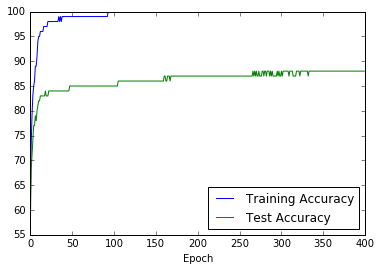

In [41]:
plt.plot(range(len(training_accuracy)),np.divide(training_accuracy,10),label='Training Accuracy')
plt.plot(range(len(test_accuracy)),np.divide(test_accuracy,100),label='Test Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
#plt.ylim((90,100))
plt.show()

In [42]:
print('Test Accuracy final: %.2f %%' %(test_accuracy[-1]/100))

Test Accuracy final: 88.00 %


Mejoró desde el 82% de antes, para 1000 muestras de entrenamiento. Ahora con 50000 muestras, y 100 neuronas ocultas...

In [43]:
net = network2.Network([784, 100, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data, 30, 10, 0.5,
                                                                     evaluation_data = test_data,
                                                                     lmbda=5.0,
                                                                     monitor_evaluation_cost=True,
                                                                     monitor_evaluation_accuracy=True,
                                                                     monitor_training_cost=True,
                                                                     monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 2.87198537245
Accuracy on training data: 46958 / 50000
Cost on evaluation data: 12.6413980945
Accuracy on evaluation data: 9368 / 10000

Epoch 1 training complete
Cost on training data: 1.84341587936
Accuracy on training data: 47874 / 50000
Cost on evaluation data: 7.93880452477
Accuracy on evaluation data: 9509 / 10000

Epoch 2 training complete
Cost on training data: 1.2198127039
Accuracy on training data: 48296 / 50000
Cost on evaluation data: 5.10297681672
Accuracy on evaluation data: 9586 / 10000

Epoch 3 training complete
Cost on training data: 0.86798744487
Accuracy on training data: 48437 / 50000
Cost on evaluation data: 3.43728245275
Accuracy on evaluation data: 9604 / 10000

Epoch 4 training complete
Cost on training data: 0.605501832168
Accuracy on training data: 48879 / 50000
Cost on evaluation data: 2.37980482742
Accuracy on evaluation data: 9693 / 10000

Epoch 5 training complete
Cost on training data: 0.491296666499
Accura

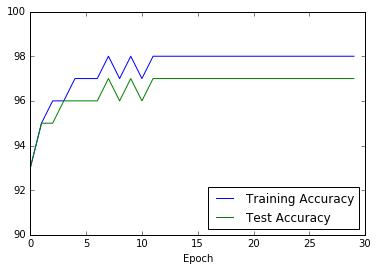

In [45]:
plt.plot(range(len(training_accuracy)),np.divide(training_accuracy,500),label='Training Accuracy')
plt.plot(range(len(test_accuracy)),np.divide(test_accuracy,100),label='Test Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.ylim((90,100))
plt.show()

In [47]:
print('Test Accuracy final: %.2f %%' %(test_accuracy[-1]/100.0))

Test Accuracy final: 97.77 %


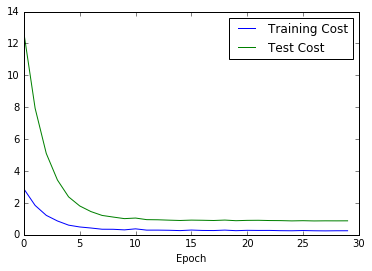

In [49]:
plt.plot(range(len(training_cost)),training_cost,label='Training Cost')
plt.plot(range(len(test_cost)),test_cost,label='Test Cost')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

Regularización L1:
$$C = C_0 + \frac{\lambda}{n} \sum_w |w|$$

La regularización L1 tiende a concentrar los valores en unos pocos pesos, y lleva al resto a cero (o muy chico).

Dropout:
Consiste en entrenar con un subconjunto (la mitad, en principio) aleatorio de las neuronas en cada mini-batch. Es similar a entrenar varias redes independientes y después hacer un "majority vote", pero no exactamente igual (por la aleatoriedad, siempre aparecen conjuntos distintos de neuronas en la red).
Al final se dividen todos los pesos de las neuronas ocultas entre 2.

Expansión artificial del conjunto de training:
Consiste en agregar nuevos datos artificiales, que vienen de la modificación de los del conjunto de training. Por ejemplo, pequeñas rotaciones, traslaciones, etc.

## Inicialización de los pesos (w, b)

Para que las neuronas no empiecen saturadas (si están saturadas el "learning-rate" es menor porque se está en la parte "plana" de las sigmoides, que tiene derivadas chicas), en vez de elegir los pesos con distribución N(0,1), se mira la cantidad de entradas a la neurona ($n_{in}$) y se eligen los pesos con distribución $N(0,\sqrt{n_{in}})$. De esta forma z no es mucho más grande (o más chico) que 1, y la neurona no satura.
Los bias se siguen eligiendo con distribución N(0,1) (no importa demasiado, hay gente que los inicializa todos en 0 igual).

Abajo se compara la inicialización N(0,1) con la idea nueva.

In [50]:
#Primero la N(0,1)
net = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
net.large_weight_initializer()
test_cost, test_accuracy, training_cost, training_accuracy = net.SGD(training_data, 30, 10, 0.1,
                                                                     evaluation_data = test_data,
                                                                     lmbda=5.0,
                                                                     monitor_evaluation_cost=True,
                                                                     monitor_evaluation_accuracy=True,
                                                                     monitor_training_cost=True,
                                                                     monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 1.99148485141
Accuracy on training data: 42793 / 50000
Cost on evaluation data: 6.31929364169
Accuracy on evaluation data: 8633 / 10000

Epoch 1 training complete
Cost on training data: 1.68779392156
Accuracy on training data: 44670 / 50000
Cost on evaluation data: 5.6410820705
Accuracy on evaluation data: 8963 / 10000

Epoch 2 training complete
Cost on training data: 1.50439721914
Accuracy on training data: 45405 / 50000
Cost on evaluation data: 5.11104968368
Accuracy on evaluation data: 9073 / 10000

Epoch 3 training complete
Cost on training data: 1.35883186366
Accuracy on training data: 46000 / 50000
Cost on evaluation data: 4.65296717594
Accuracy on evaluation data: 9177 / 10000

Epoch 4 training complete
Cost on training data: 1.23843591831
Accuracy on training data: 46381 / 50000
Cost on evaluation data: 4.24710277822
Accuracy on evaluation data: 9225 / 10000

Epoch 5 training complete
Cost on training data: 1.14083274905
Accuracy

In [51]:
#Ahora con la nueva forma de inicializar (por defecto en network2.py)
net2 = network2.Network([784, 30, 10], cost=network2.CrossEntropyCost)
test_cost2, test_accuracy2, training_cost2, training_accuracy2 = net2.SGD(training_data, 30, 10, 0.1,
                                                                     evaluation_data = test_data,
                                                                     lmbda=5.0,
                                                                     monitor_evaluation_cost=True,
                                                                     monitor_evaluation_accuracy=True,
                                                                     monitor_training_cost=True,
                                                                     monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 0.55213863493
Accuracy on training data: 46167 / 50000
Cost on evaluation data: 0.66976474946
Accuracy on evaluation data: 9248 / 10000

Epoch 1 training complete
Cost on training data: 0.463373641136
Accuracy on training data: 46927 / 50000
Cost on evaluation data: 0.638581221128
Accuracy on evaluation data: 9360 / 10000

Epoch 2 training complete
Cost on training data: 0.433315917862
Accuracy on training data: 47200 / 50000
Cost on evaluation data: 0.650066740768
Accuracy on evaluation data: 9413 / 10000

Epoch 3 training complete
Cost on training data: 0.410376072542
Accuracy on training data: 47481 / 50000
Cost on evaluation data: 0.66298802516
Accuracy on evaluation data: 9434 / 10000

Epoch 4 training complete
Cost on training data: 0.38959230018
Accuracy on training data: 47694 / 50000
Cost on evaluation data: 0.671327285229
Accuracy on evaluation data: 9482 / 10000

Epoch 5 training complete
Cost on training data: 0.373020517978


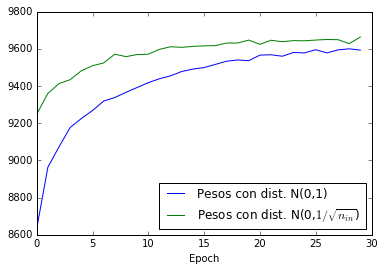

In [56]:
plt.plot(range(len(test_accuracy)),test_accuracy,label='Pesos con dist. N(0,1)')
plt.plot(range(len(test_accuracy2)),test_accuracy2,label='Pesos con dist. N(0,$1/\sqrt{n_{in}}$)')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

Se ve que con la nueva forma de elegir los pesos, el entrenamiento es más rápido.

## Elección de Hiper-parámetros

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
import network2
net = network2.Network([784,10])
net.SGD(training_data[:1000], 30, 10, 10.0, lmbda = 1000.0, 
        evaluation_data=validation_data[:100],
        monitor_evaluation_accuracy=True)

network2.py:328: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))
network2.py:205: RuntimeWarning: overflow encountered in multiply
  for w, nw in zip(self.weights, nabla_w)]


Epoch 0 training complete
Accuracy on evaluation data: 10 / 100

Epoch 1 training complete
Accuracy on evaluation data: 10 / 100

Epoch 2 training complete
Accuracy on evaluation data: 10 / 100

Epoch 3 training complete
Accuracy on evaluation data: 10 / 100

Epoch 4 training complete
Accuracy on evaluation data: 10 / 100

Epoch 5 training complete
Accuracy on evaluation data: 10 / 100

Epoch 6 training complete
Accuracy on evaluation data: 10 / 100

Epoch 7 training complete
Accuracy on evaluation data: 10 / 100

Epoch 8 training complete
Accuracy on evaluation data: 10 / 100

Epoch 9 training complete
Accuracy on evaluation data: 10 / 100

Epoch 10 training complete
Accuracy on evaluation data: 10 / 100

Epoch 11 training complete
Accuracy on evaluation data: 10 / 100

Epoch 12 training complete
Accuracy on evaluation data: 10 / 100

Epoch 13 training complete
Accuracy on evaluation data: 10 / 100

Epoch 14 training complete
Accuracy on evaluation data: 10 / 100

Epoch 15 training co

([],
 [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10],
 [],
 [])

Para encontrar un buen valor de $\eta$ (learning rate), se puede primero buscar el umbral en el cual el algoritmo empieza a oscilar o diverger (mirando la función de costo en las muestras de entrenamiento, para las primeras épocas), y empezar eligiendo un $\eta$ 2 o 3 veces menor que ese umbral

### Usar "early stopping"

La idea es medir la exactitud ("accuracy") en el conjunto de validación, y terminar el algoritmo cuando esta "no mejore".
Debido a que hay oscilaciones en esa "accuracy", conviene quedarse con el "máximo hasta ahora", y terminar cuando ese máximo no mejore en M épocas (un valor típico, puede ser 10 épocas, para empezar, y después irlo aumentando para probar; hay que considerar que las redes neuronales a veces se quedan "estancadas" por un rato y después siguen mejorando).

In [2]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
import network2M
net2 = network2M.NetworkM([784, 10], cost=network2M.CrossEntropyCost)
test_cost2, test_accuracy2, training_cost2, training_accuracy2 = net2.SGD(training_data[:1000], 30, 10, 1.0,
                                                                     evaluation_data = test_data,
                                                                     lmbda=5.0,
                                                                     monitor_evaluation_cost=True,
                                                                     monitor_evaluation_accuracy=True,
                                                                     monitor_training_cost=True,
                                                                     monitor_training_accuracy=True)

Epoch 0 training complete
Cost on training data: 2.79943051732
Accuracy on training data: 782 / 1000
Cost on evaluation data: 3.47814793545
Accuracy on evaluation data: 6942 / 10000
Etolerancia = 0

Epoch 1 training complete
Cost on training data: 2.66241871299
Accuracy on training data: 742 / 1000
Cost on evaluation data: 2.94017593193
Accuracy on evaluation data: 6415 / 10000
Etolerancia = 0

Epoch 2 training complete
Cost on training data: 2.19280139266
Accuracy on training data: 793 / 1000
Cost on evaluation data: 2.32880902772
Accuracy on evaluation data: 7119 / 10000
Etolerancia = 1

Epoch 3 training complete
Cost on training data: 1.91762678701
Accuracy on training data: 857 / 1000
Cost on evaluation data: 2.15800397229
Accuracy on evaluation data: 7676 / 10000
Etolerancia = 0

Epoch 4 training complete
Cost on training data: 1.61808716578
Accuracy on training data: 862 / 1000
Cost on evaluation data: 1.73064128159
Accuracy on evaluation data: 7654 / 10000
Etolerancia = 0

Epoch

Como posible estrategia para mejorar la condición de parada, se podría calcular la desviación estándar del máximo, y no tener en cuenta cambios dentro de una estimación de "error".

### Learning rate schedule

Normalmente el learning rate no se deja fijo, sino que se usa uno grande al principio, y después se va decreciendo.
Un criterio para decrecerlo puede ser el mismo de arriba: cuando la "accuracy" no mejora por 10 épocas consecutivas, se decrece el learning rate, y esto se repite hasta que quede en, por ejemplo, 1/1000 del valor inicial... (ahí se hace el "early stop")

### Parámetro de regularización $\lambda$

Para el parámetro de regularización $\lambda$, se puede empezar con $\lambda = 0$ y ajustar $\eta$. Después ir probando potencias de 10 para $\lambda$ hasta encontrar un orden de magnitud, y por último un buen valor.

### Tamaño del Mini-batch

Usar un mini-batch de tamaño mayor que 1 no mejora el error, por lo tanto la razón para hacerlo es únicamente de performance. Se usan mini-batches de tamaño mayor a 1 para aprovechar las bibliotecas de álgebra lineal optimizadas y el hardware particular que las está usando. A priori no es fácil elegir el valor, pero como no depende mucho de los otros hiper-parámetros, lo que se hace es elegir a los otros "más o menos bien", y después se grafica "tiempo real de cómputo" vs "tamaño del mini-batch", y se elige el valor que minimice el tiempo de cómputo.

Si no se tuvieran en cuenta esas bibliotecas de álgebra lineal (BLAS,...), lo mejor sería usar "online learning" (mini-batch = 1).

## Otras técnicas
#### Técnica de la Hessiana
Básicamente consiste en usar Taylor hasta orden 2, y minimizar. El problema es que hay que calcular muchas derivadas segundas (computacionalmente costoso).

### Momentum-based gradient descent
Usa la intuición de "una pelota cayendo por la función de costo". Tiene en cuenta variaciones del gradiente, pero no necesita un cálculo de tantas derivadas como en la Hessiana. Usa velocidades y fricción.

### Gradiente conjugado, BFGS, L-BFGS

### Nesterov (nuevo)

### Otros tipos de neurona
"tanh": $a = tanh(w \cdot x + b)$
Es fácil ver que $\sigma(z) = \frac{1 + tanh(\frac{z}{2})}{2}$
Muy parecida a la sigmoide, la principal diferencia es que el rango de activación es entre -1 y 1.
En algunos casos tiene mejor performance que la sigmoide (en una misma neurona los pesos pueden crecer/decrecer independientemenete, no como con la sigmoide; aunque eso a veces, no cambia gran cosa).

"Rectified linear unit": $a = max(0, w \cdot x +b)$
No satura en valores positivos, por lo tanto si la entrada crece, la neurona sigue aprendiendo. Si la entrada es negativa, la neurona para el aprendizaje por completo.